In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2F1ZHJleWNoYW5nL1Byb2plY3RzL0NhcHN0b25lLVNlbWluYXItUGFwZXItcmVwcm8vcmVwb3J0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/envs/actl3143/lib/python3.11/importlib/_bootstrap.py": 1761071507.1576276, "/opt/anaconda3/envs/actl3143/lib/python3.11/importlib/_bootstrap_external.py": 1761071507.158753, "/opt/anaconda3/envs/actl3143/lib/python3.11/zipimport.py": 1761071506.68767, "/opt/anaconda3/envs/actl3143/lib/python3.11/codecs.py": 1761071506.5325277, "/opt/anaconda3/envs/actl3143/lib/python3.11/encodings/aliases.py": 1761071506.8840942, "/opt/anaconda3/envs/actl3143/lib/python3.11/encodings/__init__.py": 1761071506.8829277, "/opt/anaconda3/envs/actl3143/lib/python3.11/encodings/utf_8.py": 1761071507.0203357, "/opt/anaconda3/envs/actl3143/lib/python3.11/abc.py": 1761071506.5127237, "/opt/anaconda3/envs/actl3143/lib/python3.11/io.py": 1761071506.5781493, "/opt/anaconda3/envs/actl3143/lib/python3.11/stat.py": 1761071506.6468835, "/opt/anaconda3/envs/actl3143/lib/python3.11/_collections_abc.py": 1761071506.4995985, "/opt/anaconda3/envs/actl3143/lib/python3.11/genericpath.py": 1761071506.5606189, 

In [2]:
#| label: tbl-model-leaderboard
#| tbl-cap: Model leaderboard showing validation and test performance across all model families.
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

# Look for model leaderboard
candidates = list(table_dir.glob("08_model_leaderboard*.csv")) if table_dir.exists() else []
if candidates:
    df = pd.read_csv(candidates[0])
    # Display formatted table
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Model leaderboard table not found. Expected: artifacts/tables/08_model_leaderboard.csv")

| model                         |   val_roc_auc |   val_pr_auc |   test_roc_auc |   test_pr_auc |   test_brier |   test_f1 |   test_recall |   test_precision |   threshold |
|:------------------------------|--------------:|-------------:|---------------:|--------------:|-------------:|----------:|--------------:|-----------------:|------------:|
| XGBoost                       |      0.657146 |     0.435915 |       0.663681 |      0.445441 |     0.223314 | 0.490413  |    0.738953   |         0.366982 |        0.44 |
| 05_nn_wide_deep_focal         |      0.653063 |     0.429338 |       0.661457 |      0.435612 |     0.197007 | 0.0174614 |    0.00883753 |         0.722222 |        0.44 |
| LightGBM                      |      0.650239 |     0.4311   |       0.669973 |      0.447632 |     0.219983 | 0.49688   |    0.730795   |         0.376401 |        0.44 |
| 05_nn_wide_and_deep           |      0.649779 |     0.418712 |       0.649605 |      0.42076  |     0.2364   | 0.482441  |    0.7845     |         0.348325 |        0.44 |
| RandomForest                  |      0.649016 |     0.421517 |       0.653428 |      0.428959 |     0.228971 | 0.480699  |    0.804215   |         0.342799 |        0.44 |
| 05_nn_embedding_focal_loss    |      0.648666 |     0.421622 |       0.661197 |      0.434519 |     0.197579 | 0         |    0          |         0        |        0.44 |
| 05_nn_dense_baseline          |      0.646737 |     0.425746 |       0.65528  |      0.421941 |     0.234346 | 0.489779  |    0.806254   |         0.35172  |        0.44 |
| 05_nn_embedding_baseline      |      0.642545 |     0.408729 |       0.648944 |      0.419172 |     0.232875 | 0.487391  |    0.781781   |         0.354064 |        0.44 |
| 05_nn_wide_and_deep_deeper    |      0.642242 |     0.414346 |       0.647519 |      0.411018 |     0.232793 | 0.482227  |    0.765466   |         0.351985 |        0.44 |
| 05_nn_embedding_strong_weight |      0.64173  |     0.411761 |       0.644192 |      0.408117 |     0.271837 | 0.478787  |    0.901428   |         0.325959 |        0.44 |
| 06_teacher                    |      0.63778  |     0.418322 |       0.645056 |      0.427104 |     0.193299 | 0.262616  |    0.173351   |         0.541401 |        0.44 |
| Logistic                      |      0.588286 |     0.347494 |       0.593987 |      0.355974 |     0.24378  | 0.456037  |    0.840925   |         0.312848 |        0.44 |

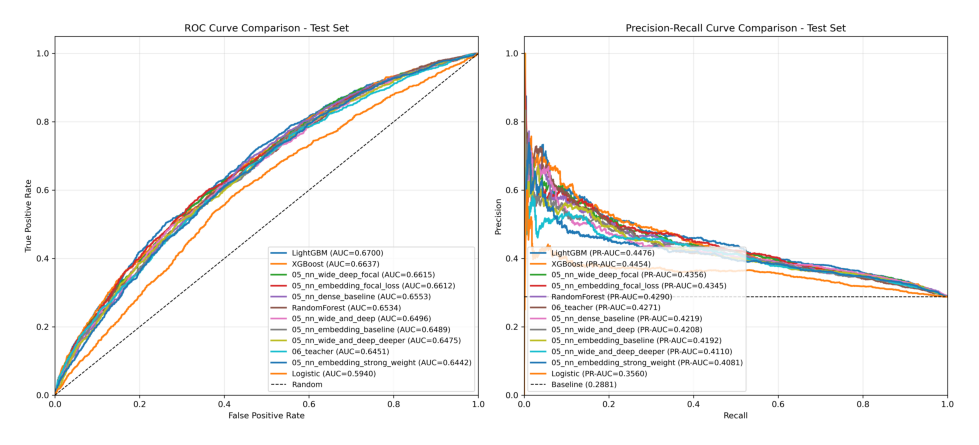

In [3]:
#| label: fig-model-comparison
#| fig-cap: ROC and Precision–Recall curves comparing all model families on the test set.
#| fig-alt: Side-by-side ROC and PR curves showing model comparison.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["08_model_comparison*.png", "*model_comparison*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Model comparison figure not found.\nExpected: artifacts/figures/08_model_comparison.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

In [4]:
#| label: tbl-logit-metrics
#| tbl-cap: Logistic regression baseline performance metrics on validation and test sets.
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("03_logit_metrics*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*logit*metrics*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Logistic regression metrics table not found.")

| split      |   threshold |   roc_auc |   pr_auc |   brier_score |   precision |   recall |   f1_score |   true_negatives |   false_positives |   false_negatives |   true_positives |
|:-----------|------------:|----------:|---------:|--------------:|------------:|---------:|-----------:|-----------------:|------------------:|------------------:|-----------------:|
| Train      |        0.44 |  0.593797 | 0.354992 |      0.24399  |    0.314526 | 0.847396 |   0.458771 |             7333 |             21735 |              1796 |             9973 |
| Validation |        0.44 |  0.588286 | 0.347494 |      0.244917 |    0.311646 | 0.836846 |   0.45416  |              915 |              2719 |               240 |             1231 |
| Test       |        0.44 |  0.593987 | 0.355974 |      0.24378  |    0.312848 | 0.840925 |   0.456037 |              917 |              2717 |               234 |             1237 |

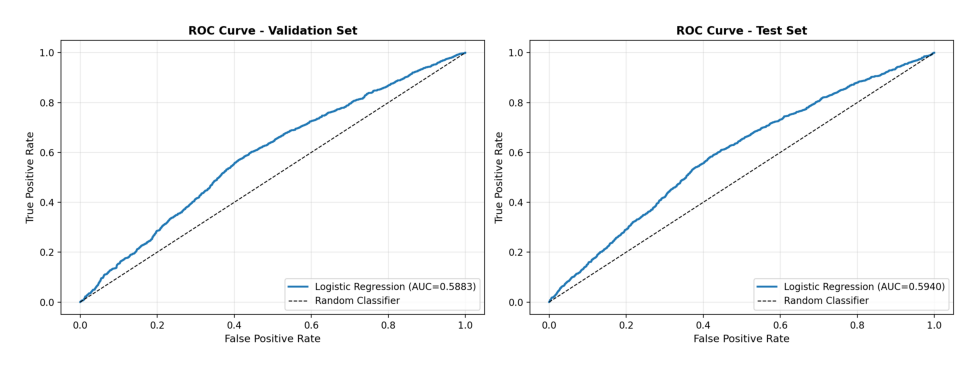

In [5]:
#| label: fig-logit-curves
#| fig-cap: Logistic regression ROC and PR curves on validation and test sets, with confusion matrix at the tuned threshold.
#| fig-alt: ROC curves, PR curves, and confusion matrix for logistic regression baseline.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

# Try to find logit ROC/PR curves
candidates = []
if fig_dir.exists():
    for pat in ["03_logit_roc*.png", "*logit*roc*.png", "03_logit_pr*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Logistic regression curves not found.\nExpected: artifacts/figures/03_logit_*.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

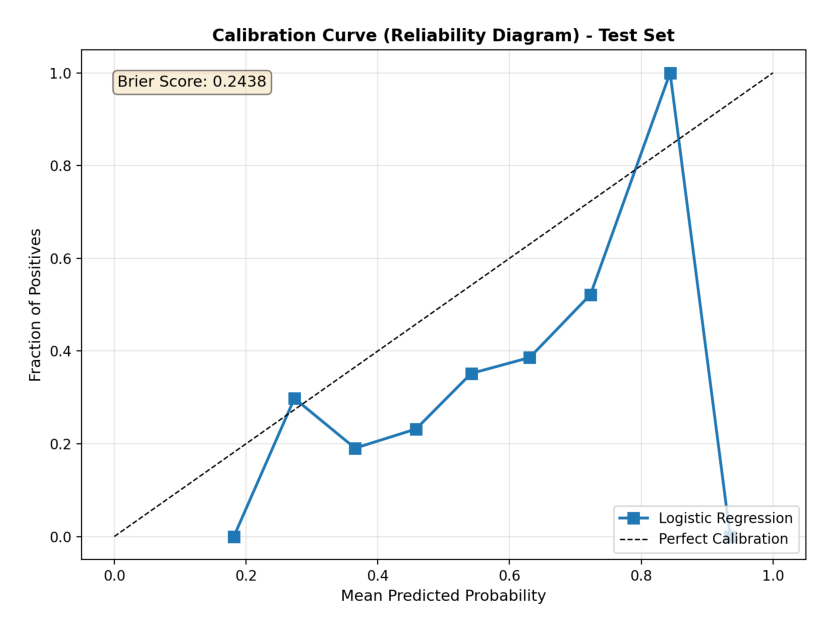

In [6]:
#| label: fig-logit-calibration
#| fig-cap: Calibration (reliability) diagram for logistic regression with Brier score annotation.
#| fig-alt: Reliability diagram showing probability calibration quality.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["03_logit_calibration*.png", "*logit*calibration*.png", "*calibration*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Calibration diagram not found.\nExpected: artifacts/figures/03_logit_calibration.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

In [7]:
#| label: tbl-tree-leaderboard
#| tbl-cap: Performance summary of tree-based models on validation and test sets.
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("04_tree_leaderboard*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*tree*leaderboard*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Tree leaderboard table not found. Expected: artifacts/tables/04_tree_leaderboard.csv")

| model        | split   |   roc_auc |   pr_auc |   brier_score |   threshold |   precision |   recall |   f1_score |   true_negatives |   false_positives |   false_negatives |   true_positives |
|:-------------|:--------|----------:|---------:|--------------:|------------:|------------:|---------:|-----------:|-----------------:|------------------:|------------------:|-----------------:|
| dt_baseline  | val     |  0.631703 | 0.403643 |      0.238156 |         0.5 |    0.370782 | 0.590075 |   0.455404 |             2161 |              1473 |               603 |              868 |
| dt_baseline  | test    |  0.625077 | 0.393425 |      0.238209 |         0.5 |    0.367982 | 0.57036  |   0.447347 |             2193 |              1441 |               632 |              839 |
| rf_baseline  | val     |  0.649016 | 0.421517 |      0.231366 |         0.5 |    0.365991 | 0.662814 |   0.471584 |             1945 |              1689 |               496 |              975 |
| rf_baseline  | test    |  0.653428 | 0.428959 |      0.228971 |         0.5 |    0.373933 | 0.655337 |   0.476167 |             2020 |              1614 |               507 |              964 |
| xgb_baseline | val     |  0.657146 | 0.435915 |      0.226199 |         0.5 |    0.385664 | 0.596193 |   0.468358 |             2237 |              1397 |               594 |              877 |
| xgb_baseline | test    |  0.663681 | 0.445441 |      0.223314 |         0.5 |    0.39354  | 0.588035 |   0.471518 |             2301 |              1333 |               606 |              865 |
| xgb_optuna   | val     |  0.657618 | 0.437372 |      0.23188  |         0.5 |    0.382098 | 0.658736 |   0.483654 |             2067 |              1567 |               502 |              969 |
| xgb_optuna   | test    |  0.669062 | 0.44394  |      0.227888 |         0.5 |    0.390638 | 0.658056 |   0.490251 |             2124 |              1510 |               503 |              968 |
| lgbm_small   | val     |  0.650239 | 0.4311   |      0.224585 |         0.5 |    0.388305 | 0.577838 |   0.464481 |             2295 |              1339 |               621 |              850 |
| lgbm_small   | test    |  0.669973 | 0.447632 |      0.219983 |         0.5 |    0.401504 | 0.580557 |   0.474708 |             2361 |              1273 |               617 |              854 |

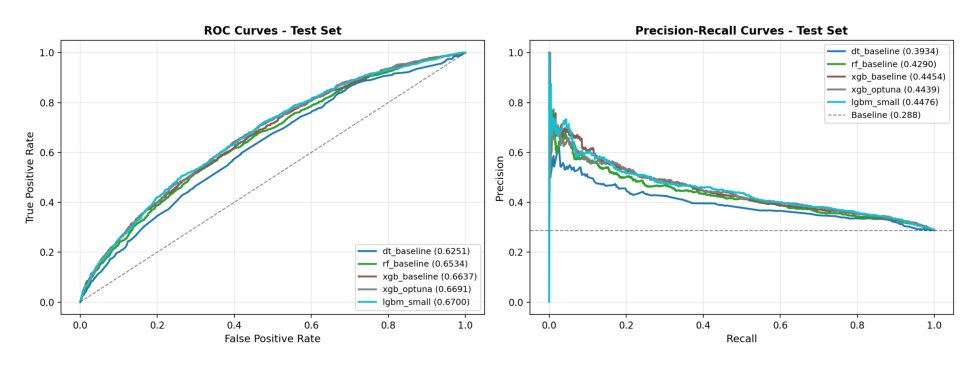

In [8]:
#| label: fig-tree-rocpr-test
#| fig-cap: ROC and Precision–Recall curves for tree/GBM models on the test set.
#| fig-alt: ROC and PR curves comparing Decision Tree, Random Forest, XGBoost, and LightGBM.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["04_all_tree_roc_pr*.png", "*tree*roc*pr*.png", "04_tree*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Tree ROC/PR comparison not found.\nExpected: artifacts/figures/04_all_tree_roc_pr_test.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

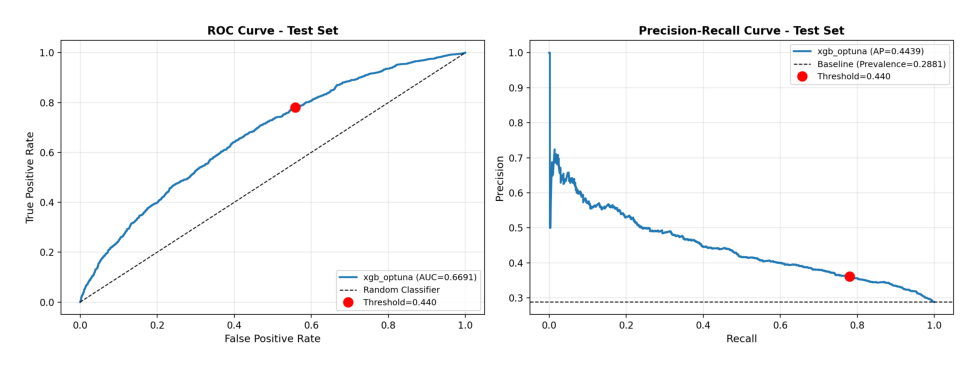

In [9]:
#| label: fig-xgb-operating-point
#| fig-cap: Tuned XGBoost ROC/PR curves with the selected operating threshold (0.4400) highlighted on the test set.
#| fig-alt: ROC and PR curves with operating point marker.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["04_best_roc_pr_point*.png", "*xgb*operating*.png", "*best*roc*pr*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "XGBoost operating point figure not found.\nExpected: artifacts/figures/04_best_roc_pr_point_test.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

In [10]:
#| label: tbl-nn-leaderboard
#| tbl-cap: PyTorch neural network results (test metrics at validation-selected thresholds).
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("05_nn_leaderboard*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*nn*leaderboard*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Neural network leaderboard not found. Expected: artifacts/tables/05_nn_leaderboard.csv")

| experiment              |   train_auc |   val_auc |   test_auc |   test_pr_auc |   test_brier |   best_threshold_val |   test_precision_at_best_threshold |   test_recall_at_best_threshold |   test_f1_at_best_threshold |   best_epoch |   train_time_sec | loss_type    |   pos_weight |   focal_alpha |   focal_gamma |
|:------------------------|------------:|----------:|-----------:|--------------:|-------------:|---------------------:|-----------------------------------:|--------------------------------:|----------------------------:|-------------:|-----------------:|:-------------|-------------:|--------------:|--------------:|
| wide_deep_focal         |    0.685802 |  0.653063 |   0.661457 |      0.435612 |     0.197007 |                 0.31 |                           0.364389 |                        0.717879 |                    0.483406 |           62 |          52.0644 | focal        |      2.46988 |          0.25 |             2 |
| wide_and_deep           |    0.698333 |  0.649779 |   0.649605 |      0.42076  |     0.2364   |                 0.46 |                           0.352218 |                        0.739633 |                    0.477193 |           44 |          41.8901 | bce_weighted |      2.46988 |          0    |             0 |
| embedding_focal_loss    |    0.686024 |  0.648666 |   0.661197 |      0.434519 |     0.197579 |                 0.3  |                           0.342906 |                        0.811693 |                    0.482132 |           49 |          42.9464 | focal        |      2.46988 |          0.25 |             2 |
| dense_baseline          |    0.677815 |  0.646737 |   0.65528  |      0.421941 |     0.234346 |                 0.48 |                           0.369023 |                        0.723997 |                    0.488868 |           76 |          48.8865 | bce_weighted |      2.46988 |          0    |             0 |
| embedding_baseline      |    0.683021 |  0.642545 |   0.648944 |      0.419172 |     0.232875 |                 0.42 |                           0.346409 |                        0.816451 |                    0.486432 |           33 |          30.1891 | bce_weighted |      2.46988 |          0    |             0 |
| wide_and_deep_deeper    |    0.695702 |  0.642242 |   0.647519 |      0.411018 |     0.232793 |                 0.46 |                           0.359181 |                        0.727396 |                    0.480899 |           27 |          35.4544 | bce_weighted |      2.46988 |          0    |             0 |
| embedding_strong_weight |    0.688739 |  0.64173  |   0.644192 |      0.408117 |     0.271837 |                 0.54 |                           0.354619 |                        0.743712 |                    0.480246 |           38 |          34.5281 | bce_weighted |      3.70482 |          0    |             0 |

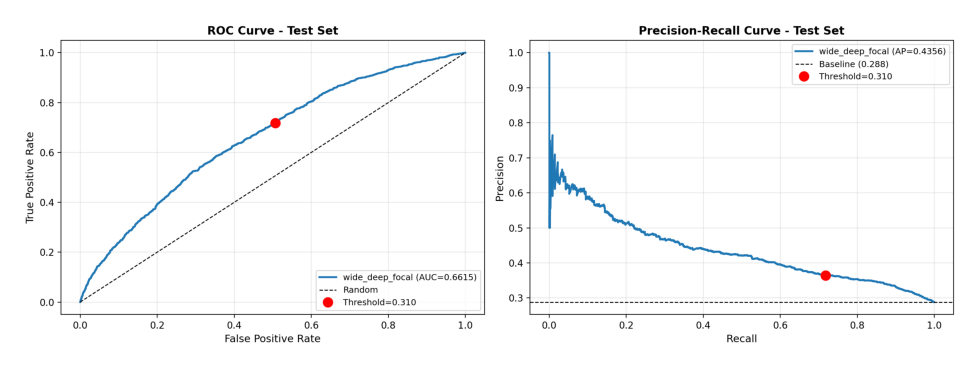

In [11]:
#| label: fig-nn-best-rocpr
#| fig-cap: Best neural model (Wide & Deep with Focal Loss) ROC/PR curves with selected operating threshold on the test set.
#| fig-alt: ROC and PR curves for the best neural network model.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["05_nn_wide_deep_focal_roc_pr*.png", "*nn*wide*deep*focal*roc*.png", "05_nn*best*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Best NN ROC/PR figure not found.\nExpected: artifacts/figures/05_nn_wide_deep_focal_roc_pr_test.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

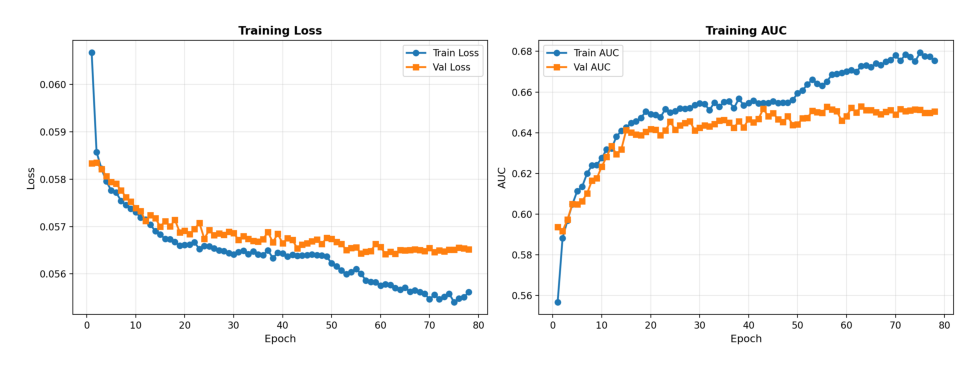

In [12]:
#| label: fig-nn-curves-best
#| fig-cap: Training versus validation loss and AUC curves for the best neural network model (Wide & Deep with Focal Loss).
#| fig-alt: Learning curves showing training dynamics.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["05_nn_wide_deep_focal_curves*.png", "*nn*wide*deep*focal*curves*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Best NN training curves not found.\nExpected: artifacts/figures/05_nn_wide_deep_focal_curves.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

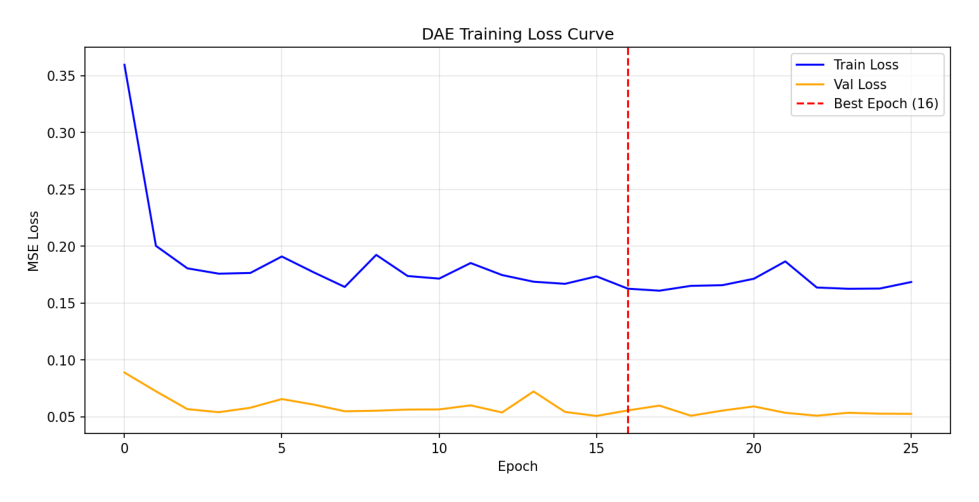

In [13]:
#| label: fig-dae-loss
#| fig-cap: DAE reconstruction loss curves with early-stopping epoch marked.
#| fig-alt: Training and validation reconstruction loss over epochs.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["06_dae_loss*.png", "*dae*loss*.png", "06_autoencoder*loss*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "DAE loss curve not found.\nExpected: artifacts/figures/06_dae_loss_curve.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

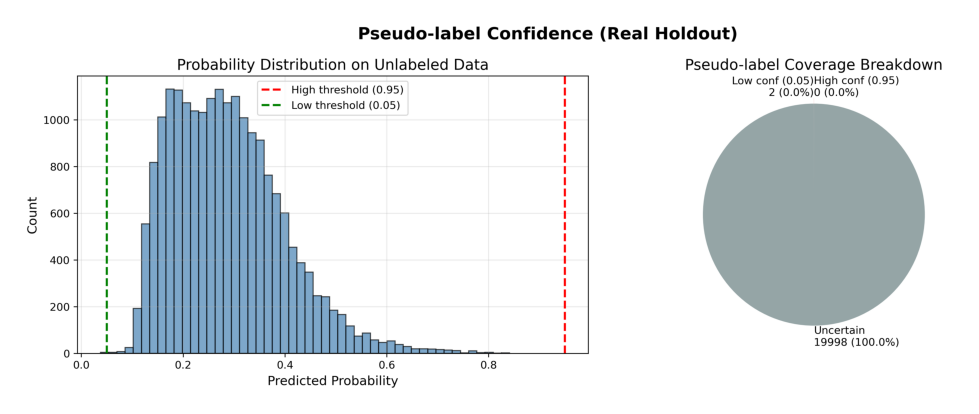

In [14]:
#| label: fig-pseudolabel-confidence
#| fig-cap: Teacher probability distribution on the unlabeled holdout and pseudo-label coverage at thresholds 0.0500/0.9500.
#| fig-alt: Histogram of predicted probabilities showing pseudo-label coverage.
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["06_pseudo_confidence*.png", "*pseudo*confidence*.png", "*pseudolabel*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Pseudo-label confidence figure not found.\nExpected: artifacts/figures/06_pseudo_confidence_dist.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()

In [15]:
#| label: tbl-ae-ablation
#| tbl-cap: Downstream impact of DAE latent features (baseline vs. latent-only vs. augmented).
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("06_autoencoder_ablation*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*ae*ablation*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Autoencoder ablation table not found. Expected: artifacts/tables/06_autoencoder_ablation.csv")

| version              | split   |   n_features |   roc_auc |   pr_auc |   brier_score |   threshold_fixed |   precision_fixed |   recall_fixed |   f1_fixed |   threshold_tuned |   precision_tuned |   recall_tuned |   f1_tuned |
|:---------------------|:--------|-------------:|----------:|---------:|--------------:|------------------:|------------------:|---------------:|-----------:|------------------:|------------------:|---------------:|-----------:|
| Baseline (X only)    | test    |           11 |  0.646541 | 0.425392 |      0.19332  |              0.44 |          0.530303 |       0.14276  |   0.22496  |              0.25 |          0.353871 |       0.730116 |   0.476698 |
| Latent-only (Z only) | test    |           32 |  0.625202 | 0.387228 |      0.197288 |              0.44 |          0.470149 |       0.085656 |   0.144911 |              0.24 |          0.339952 |       0.768185 |   0.471324 |
| Augmented (X + Z)    | test    |           43 |  0.645056 | 0.427104 |      0.193299 |              0.44 |          0.541401 |       0.173351 |   0.262616 |              0.25 |          0.35947  |       0.719918 |   0.479511 |

In [16]:
#| label: tbl-ensemble-leaderboard
#| tbl-cap: Ensemble performance comparison on validation and test sets (ROC-AUC and PR-AUC).
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("07_ensemble_leaderboard*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*ensemble*leaderboard*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Ensemble leaderboard not found. Expected: artifacts/tables/07_ensemble_leaderboard.csv")

| model             |   val_roc_auc |   val_pr_auc |   test_roc_auc |   test_pr_auc |   fixed_threshold |   val_best_threshold |   test_best_threshold |
|:------------------|--------------:|-------------:|---------------:|--------------:|------------------:|---------------------:|----------------------:|
| Blend_WeightedAUC |      0.658276 |     0.434834 |       0.668847 |      0.448774 |              0.44 |             0.435955 |              0.423938 |
| Blend_SimpleAvg   |      0.657885 |     0.432159 |       0.668322 |      0.447171 |              0.44 |             0.441047 |              0.422707 |
| Stacking_OOF      |      0.658582 |     0.436697 |       0.667918 |      0.448953 |              0.44 |             0.224024 |              0.225712 |
| Blend_NNLS        |      0.658656 |     0.437131 |       0.66724  |      0.448761 |              0.44 |             0.422218 |              0.417435 |
| Blend_RankAvg     |      0.654898 |     0.416895 |       0.664951 |      0.434002 |              0.44 |          2029        |           1616.25     |

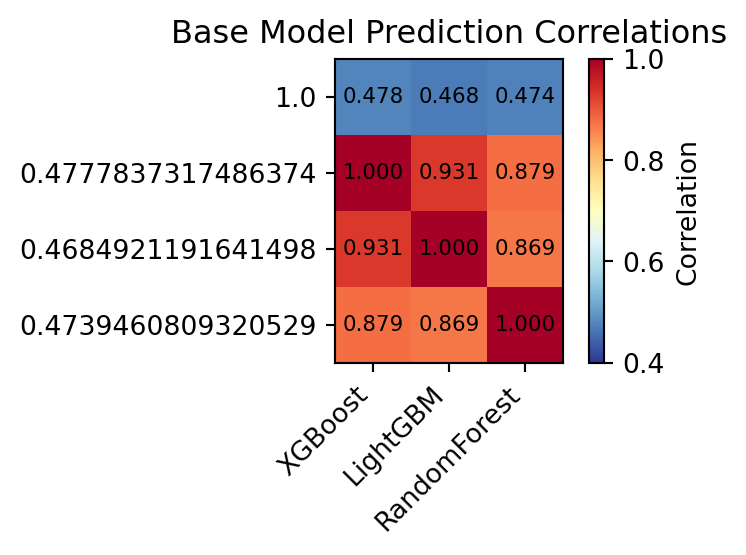

In [17]:
#| label: fig-ensemble-corr
#| fig-cap: Correlation matrix of base model predictions on the validation set (lower correlation indicates greater diversity).
#| fig-alt: Heatmap showing prediction correlations between base models.
#| out-width: 60%
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"
table_dir = root / "artifacts" / "tables"

# Try to find pre-generated heatmap first
candidates = []
if fig_dir.exists():
    for pat in ["07_diversity_corr*.png", "*diversity*corr*.png", "*ensemble*corr*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

if candidates:
    plt.figure(figsize=(3.8, 2.6))
    plt.axis("off")
    img = mpimg.imread(candidates[0])
    plt.imshow(img)
    plt.tight_layout()
else:
    # Try to generate from CSV
    csv_candidates = list(table_dir.glob("07_diversity_corr*.csv")) if table_dir.exists() else []
    if csv_candidates:
        df = pd.read_csv(csv_candidates[0], index_col=0)
        fig, ax = plt.subplots(figsize=(4, 3))
        im = ax.imshow(df.values, cmap='RdYlBu_r', vmin=0.4000, vmax=1.0)
        ax.set_xticks(range(len(df.columns)))
        ax.set_yticks(range(len(df.index)))
        ax.set_xticklabels(df.columns, rotation=45, ha='right')
        ax.set_yticklabels(df.index)
        plt.colorbar(im, ax=ax, label='Correlation')
        ax.set_title('Base Model Prediction Correlations')
        for i in range(len(df.index)):
            for j in range(len(df.columns)):
                ax.text(j, i, f'{df.iloc[i, j]:.3f}', ha='center', va='center', fontsize=8)
        plt.tight_layout()
    else:
        plt.figure(figsize=(3.8, 2.6))
        plt.axis("off")
        plt.text(0.5000, 0.5000, "Correlation matrix not found.\nExpected: artifacts/tables/07_diversity_corr_val.csv",
                 ha="center", va="center", fontsize=10)

In [18]:
#| label: tbl-operating-point
#| tbl-cap: Operating point comparison across models at fixed threshold τ = 0.4400.
#| echo: false
#| warning: false

from pathlib import Path
import pandas as pd

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
table_dir = root / "artifacts" / "tables"

candidates = list(table_dir.glob("08_model_leaderboard*.csv")) if table_dir.exists() else []
if not candidates:
    candidates = list(table_dir.glob("*operating*point*.csv")) if table_dir.exists() else []

if candidates:
    df = pd.read_csv(candidates[0])
    from IPython.display import Markdown
    display(Markdown(df.to_markdown(index=False)))
else:
    print("Operating point table not found. Expected: artifacts/tables/08_model_leaderboard.csv")

| model                         |   val_roc_auc |   val_pr_auc |   test_roc_auc |   test_pr_auc |   test_brier |   test_f1 |   test_recall |   test_precision |   threshold |
|:------------------------------|--------------:|-------------:|---------------:|--------------:|-------------:|----------:|--------------:|-----------------:|------------:|
| XGBoost                       |      0.657146 |     0.435915 |       0.663681 |      0.445441 |     0.223314 | 0.490413  |    0.738953   |         0.366982 |        0.44 |
| 05_nn_wide_deep_focal         |      0.653063 |     0.429338 |       0.661457 |      0.435612 |     0.197007 | 0.0174614 |    0.00883753 |         0.722222 |        0.44 |
| LightGBM                      |      0.650239 |     0.4311   |       0.669973 |      0.447632 |     0.219983 | 0.49688   |    0.730795   |         0.376401 |        0.44 |
| 05_nn_wide_and_deep           |      0.649779 |     0.418712 |       0.649605 |      0.42076  |     0.2364   | 0.482441  |    0.7845     |         0.348325 |        0.44 |
| RandomForest                  |      0.649016 |     0.421517 |       0.653428 |      0.428959 |     0.228971 | 0.480699  |    0.804215   |         0.342799 |        0.44 |
| 05_nn_embedding_focal_loss    |      0.648666 |     0.421622 |       0.661197 |      0.434519 |     0.197579 | 0         |    0          |         0        |        0.44 |
| 05_nn_dense_baseline          |      0.646737 |     0.425746 |       0.65528  |      0.421941 |     0.234346 | 0.489779  |    0.806254   |         0.35172  |        0.44 |
| 05_nn_embedding_baseline      |      0.642545 |     0.408729 |       0.648944 |      0.419172 |     0.232875 | 0.487391  |    0.781781   |         0.354064 |        0.44 |
| 05_nn_wide_and_deep_deeper    |      0.642242 |     0.414346 |       0.647519 |      0.411018 |     0.232793 | 0.482227  |    0.765466   |         0.351985 |        0.44 |
| 05_nn_embedding_strong_weight |      0.64173  |     0.411761 |       0.644192 |      0.408117 |     0.271837 | 0.478787  |    0.901428   |         0.325959 |        0.44 |
| 06_teacher                    |      0.63778  |     0.418322 |       0.645056 |      0.427104 |     0.193299 | 0.262616  |    0.173351   |         0.541401 |        0.44 |
| Logistic                      |      0.588286 |     0.347494 |       0.593987 |      0.355974 |     0.24378  | 0.456037  |    0.840925   |         0.312848 |        0.44 |

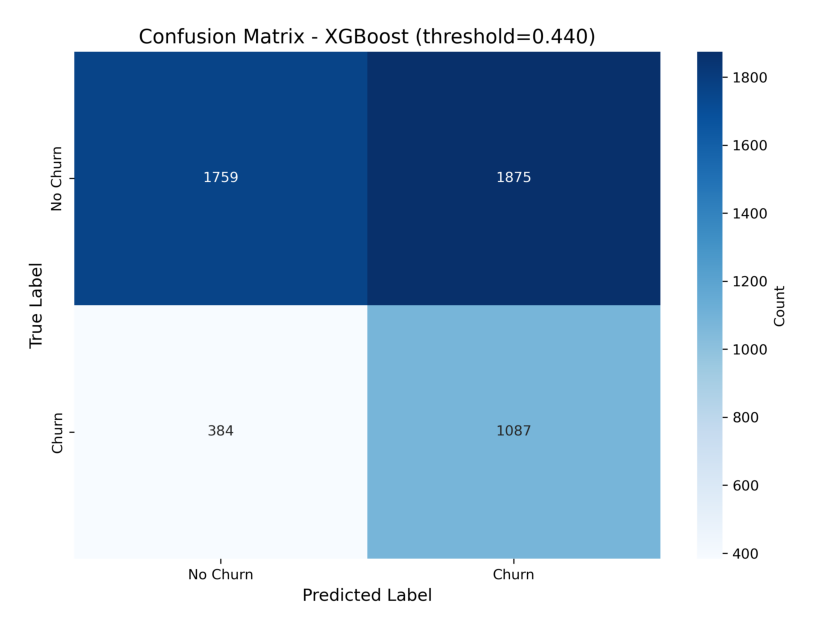

In [19]:
#| label: fig-confmat-xgb
#| fig-cap: Confusion matrix for XGBoost at the operating threshold τ = 0.4400 on the test set.
#| fig-alt: Confusion matrix showing TP, FP, TN, FN counts.
#| out-width: 70%
#| echo: false
#| warning: false

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_project_root(start: Path) -> Path:
    p = start.resolve()
    for _ in range(12):
        if (p / "_quarto.yml").exists() or (p / ".git").exists():
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

root = find_project_root(Path.cwd())
fig_dir = root / "artifacts" / "figures"

candidates = []
if fig_dir.exists():
    for pat in ["08_confusion_matrix*.png", "*confusion*matrix*.png", "*confmat*.png"]:
        candidates.extend(sorted(fig_dir.glob(pat)))

img_path = candidates[0] if candidates else None

plt.figure(figsize=(5.2, 3.4))
plt.axis("off")
if img_path:
    img = mpimg.imread(img_path)
    plt.imshow(img)
else:
    plt.text(0.5000, 0.5000, "Confusion matrix figure not found.\nExpected: artifacts/figures/08_confusion_matrix.png",
             ha="center", va="center", fontsize=10)
plt.tight_layout()